Omnidirectional Spectra

In [1]:
import numpy as np
import omnidirectional_spectra
import plots
wavenumbers=np.logspace(-3,4,500) #np.linspace(0.001,10000,10000000)
windspeeds=[10]#[4,8,12,16]

Pierson Moskowitz Spectrum

In [2]:
PM_spectrum=[omnidirectional_spectra.pierson_moskowitz(wavenumbers,windspeed) for windspeed in windspeeds]

In [3]:
#plots.Spectra(wavenumbers, windspeeds, PM_spectrum, r'$S_{PM}$', 'Wavenumber [rad/m]', 'Elevation Spectrum [m²/rad/m]','pierson_moskowitz')

JONSWAP Spectrum

In [4]:
JONSWAP_Spectrum=[omnidirectional_spectra.JONSWAP(wavenumbers,windspeed) for windspeed in windspeeds]

In [5]:
#plots.Spectra(wavenumbers, windspeeds, JONSWAP_Spectrum, r'$S_{J}$', 'Wavenumber [rad/m]', 'Elevation Spectrum [m²/rad/m]','JONSWAP')

Elfouhaily Spectrum

In [6]:
Elfouhaily_Spectrum=[omnidirectional_spectra.Elfouhaily(wavenumbers,windspeed) for windspeed in windspeeds]

In [7]:
#plots.Spectra(wavenumbers, windspeeds, Elfouhaily_Spectrum, r'$S_{E}$', 'Wavenumber [rad/m]', 'Elevation Spectrum [m²/rad/m]','Elfouhaily')

Spreading Functions

In [8]:
import spreading_functions
theta=2*np.pi*np.linspace(0,2,250)
wind_direction=np.pi/4
#theta=theta+np.pi/4

Simple Cosine Function

In [9]:
n=[2,4,6,8]
Simple_Cosine_Spreads=[spreading_functions.Simple_Cosine(theta, wind_direction, i) for i in n]

In [10]:
#plots.Spread(theta, n, Simple_Cosine_Spreads, "Simple Cosine","n","SimpleCosine")

Longuet-Higgins

In [11]:
S=[8, 10, 20]
LH_Spreads=[spreading_functions.Longuet_Higgins(theta, wind_direction, i) for i in S]

In [12]:
#plots.Spread(theta, S, LH_Spreads, "Longuet-Higgins","S", "Longuet_Higgins")

Elfouhaily

In [13]:
Elfouhaily_Spread=[spreading_functions.Elfouhaily(theta, wind_direction, 0.1, windspeed) for windspeed in windspeeds]

In [14]:
#plots.Spread(theta, windspeeds, Elfouhaily_Spread, "Elfouhaily", None, "Elfouhaily", True)

Surface

In [15]:
from surface import surfaceGenerator
size=(500, 500)
surfaceGenerator=surfaceGenerator(JONSWAP_Spectrum[0],LH_Spreads[0], wavenumbers, theta, size, facet=2.5, seconds=3)
surface=surfaceGenerator.generate()

Generating frame 1


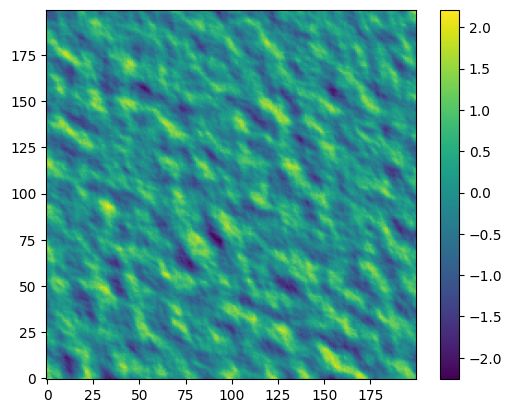

In [17]:
import matplotlib.pyplot as plt
plt.imshow(surface[0,:,:])
plt.gca().invert_yaxis()
#plt.xlim(0, size[0])
plt.colorbar()


In [31]:
from scipy.fft import fft2, ifft2
from matplotlib.colors import Normalize
surfaceFrequency=fft2(surface[0,:,:])
for t in range(1, 3):
    tmp=surfaceFrequency.copy()
    for i_index, i in enumerate(wavenumbers):
        tmp*=np.exp(1j*np.sqrt(9.8067*i)*t)
    surface[t,::]=ifft2(tmp).real
import cv2
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video=cv2.VideoWriter("results/waveVideo.avi",fourcc,1,(200,200))
for t in range(0,3):
    norm = Normalize(vmin=surface[t].min(), vmax=surface[t].max())
    rgb_frame = plt.cm.viridis(norm(surface[t]))
    rgb_frame = (rgb_frame[:, :, :3] * 255).astype(np.uint8)
    video.write(rgb_frame)
video.release()

ValueError: can only convert an array of size 1 to a Python scalar